In [8]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [9]:
url = 'https://drive.google.com/file/d/1lV7is1B566UQPYzzY8R2ZmOritTW299S/view'
path = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(path)
print("The shape of the dataset is:", df.shape)
df.head()

The shape of the dataset is: (9994, 13)


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [10]:
df.describe()


,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [11]:
df.nunique()


Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [12]:
df.count()

Ship Mode       9994
Segment         9994
Country         9994
City            9994
State           9994
Postal Code     9994
Region          9994
Category        9994
Sub-Category    9994
Sales           9994
Quantity        9994
Discount        9994
Profit          9994
dtype: int64

In [13]:
df.drop(["Country","Postal Code"], axis=1, inplace=True)

In [14]:
df.drop_duplicates(inplace=True)

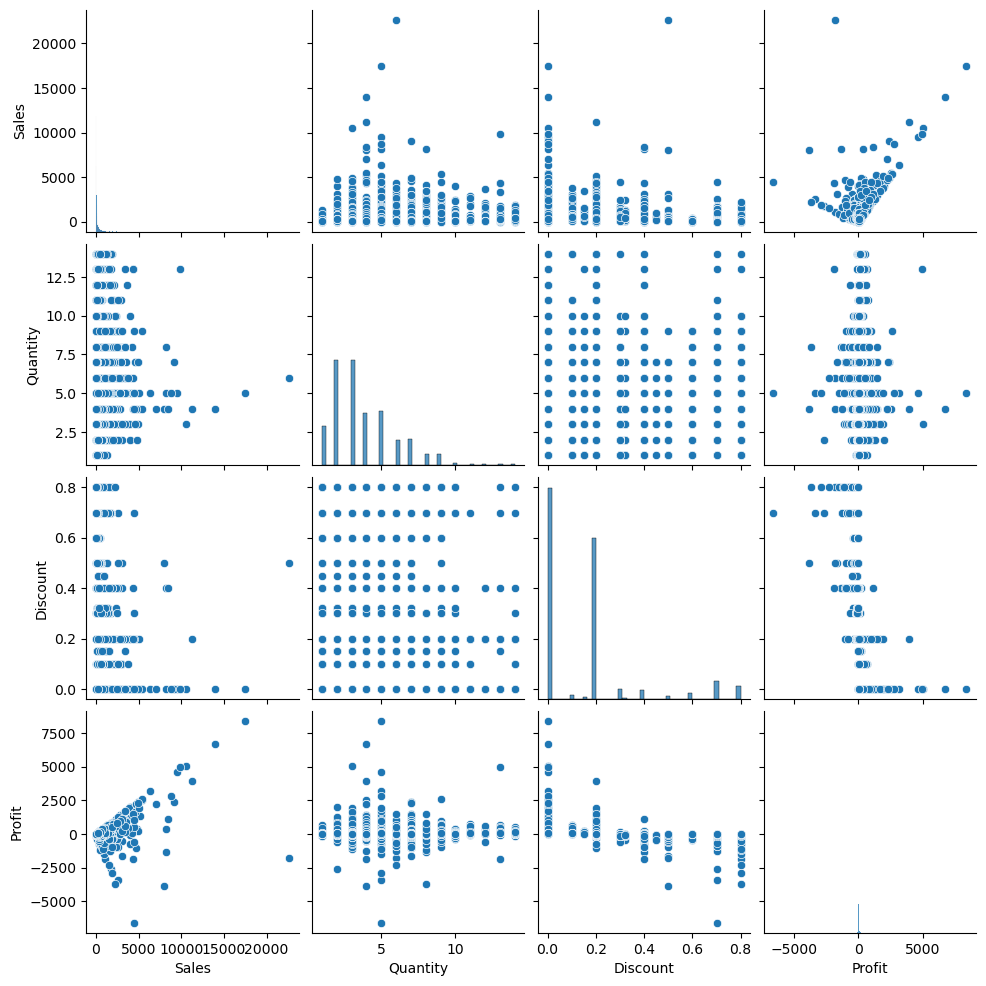

In [15]:
sn.pairplot(df)


<Axes: >

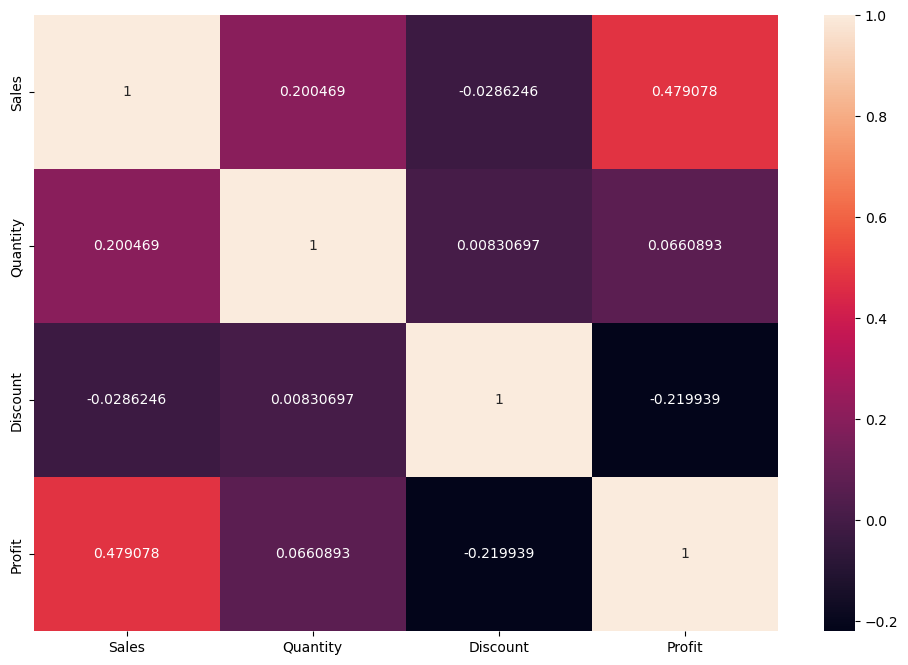

In [37]:
corr = df.corr(numeric_only = True)
plt.figure(figsize = (12,8))
sn.heatmap(corr, annot = True, fmt = 'g')

<Axes: >

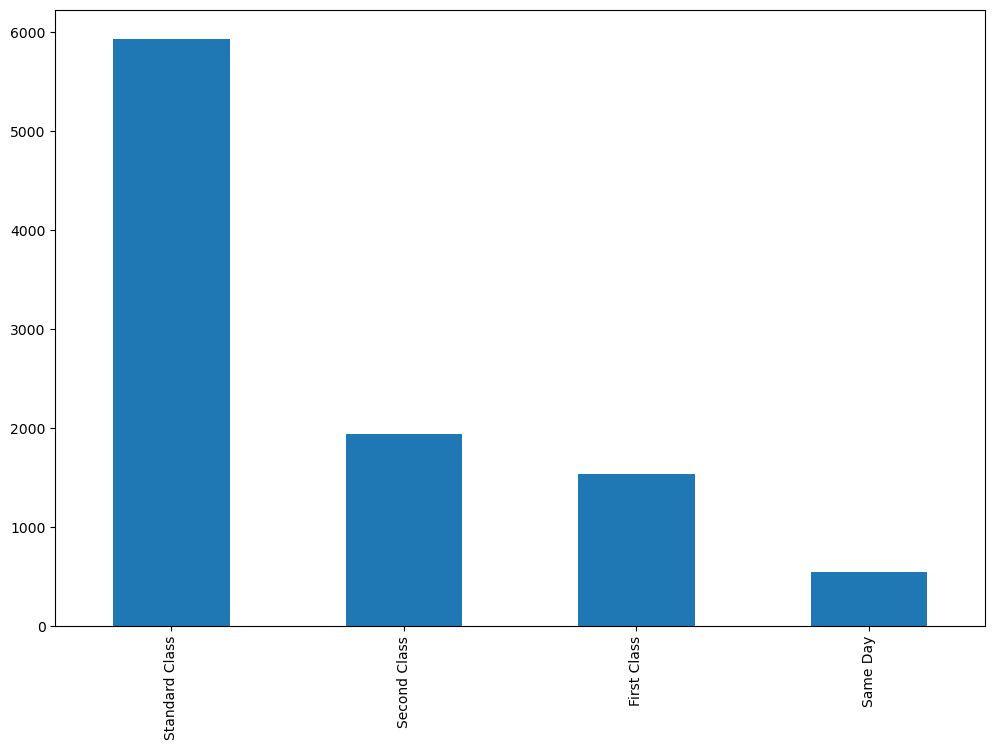

In [38]:
s = df["Ship Mode"].value_counts()
s.plot(kind='bar', figsize=(12,8))

In [41]:
sm = df.groupby('Ship Mode')[['Sales', 'Profit']].sum()
sm

,Sales,Profit
Ship Mode,,
First Class,3.512746e+05,48910.4477
Same Day,1.283217e+05,15871.8869
Second Class,4.591240e+05,57425.5716
Standard Class,1.355879e+06,163889.6517


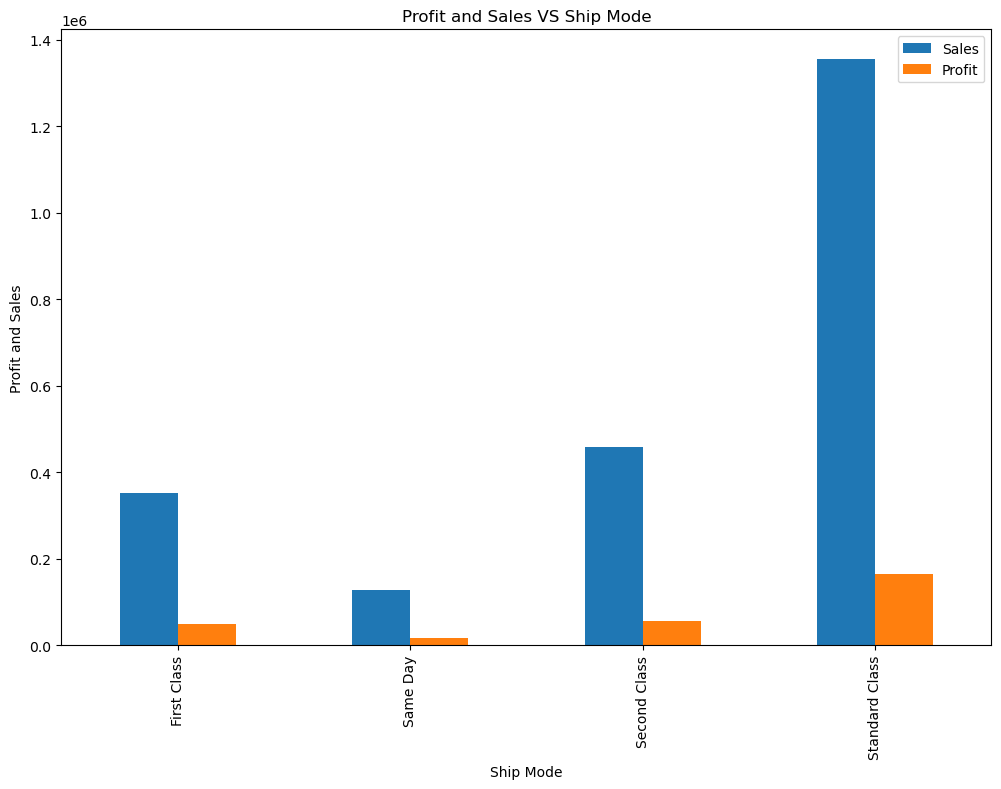

In [42]:
sm.plot(kind = "bar", figsize=(12,8))
plt.title("Profit and Sales VS Ship Mode")
plt.ylabel("Profit and Sales")
plt.show()

<Axes: >

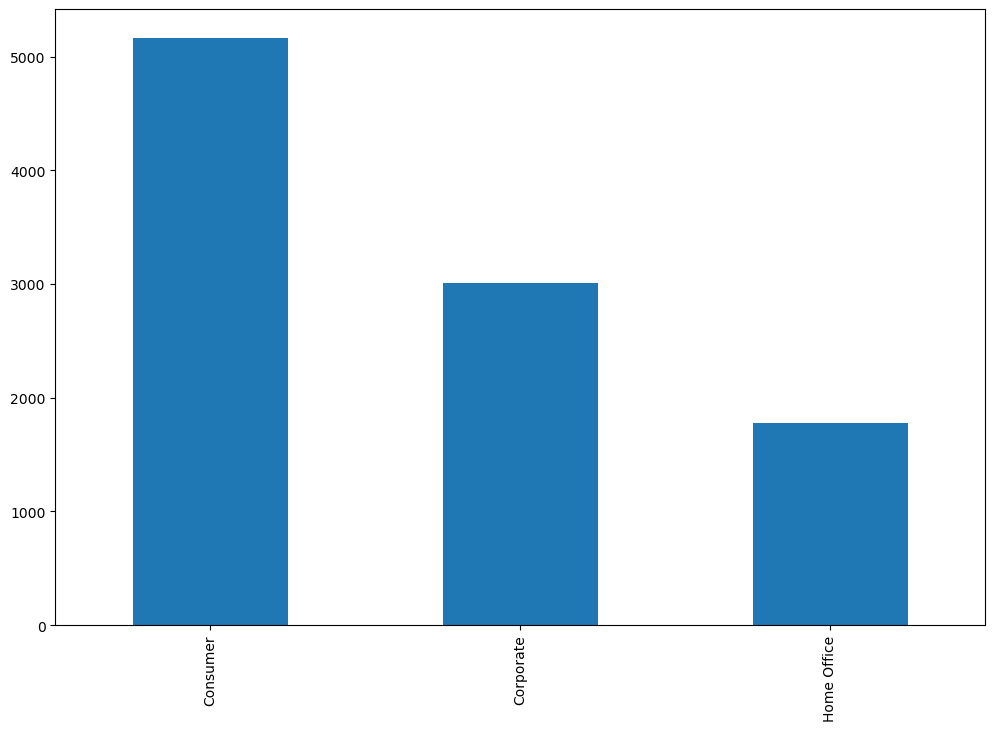

In [43]:
seg = df["Segment"].value_counts()
seg.plot(kind='bar', figsize=(12,8))

In [21]:
se = df.groupby("Segment")[["Sales","Profit"]].sum()
se

,Sales,Profit
Segment,,
Consumer,1.159418e+06,133939.5218
Corporate,7.059702e+05,91911.1606
Home Office,4.292117e+05,60246.8755


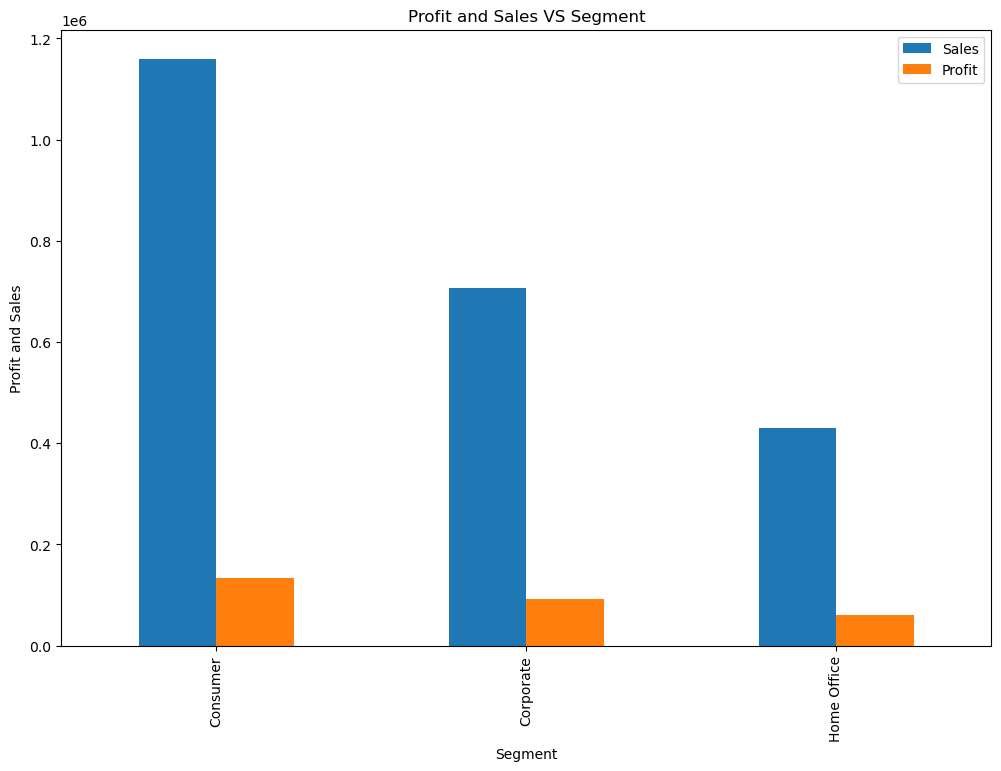

In [44]:
se.plot(kind = "bar", figsize=(12,8))
plt.title("Profit and Sales VS Segment")
plt.ylabel("Profit and Sales")
plt.show()

<Axes: >

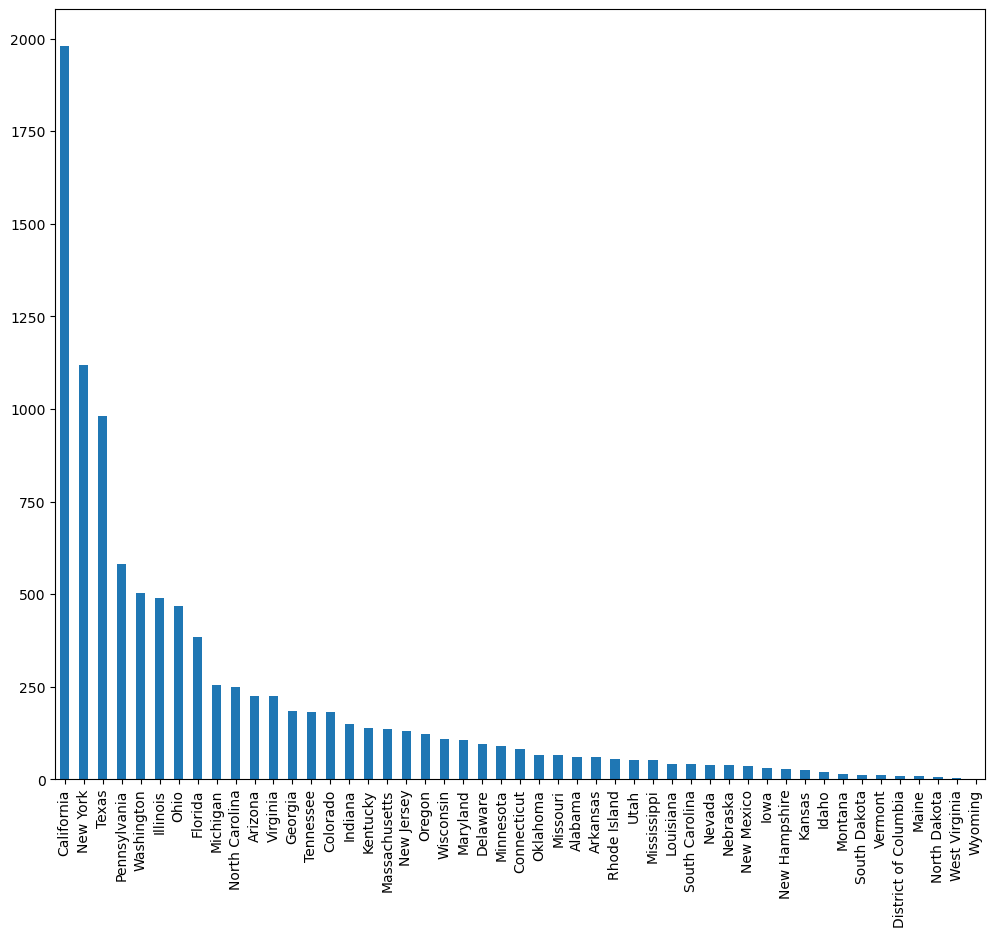

In [46]:
st = df["State"].value_counts()
st.plot(kind="bar", figsize=(12,10))

In [24]:
state = df.groupby("State")[["Sales","Profit"]].sum()
state

,Sales,Profit
State,,
Alabama,19510.6400,5786.8253
Arizona,35282.0010,-3427.9246
Arkansas,11678.1300,4008.6871
California,456629.9285,76215.9705
Colorado,32108.1180,-6527.8579
Connecticut,13384.3570,3511.4918
Delaware,27451.0690,9977.3748
District of Columbia,2865.0200,1059.5893
Florida,89473.7080,-3399.3017


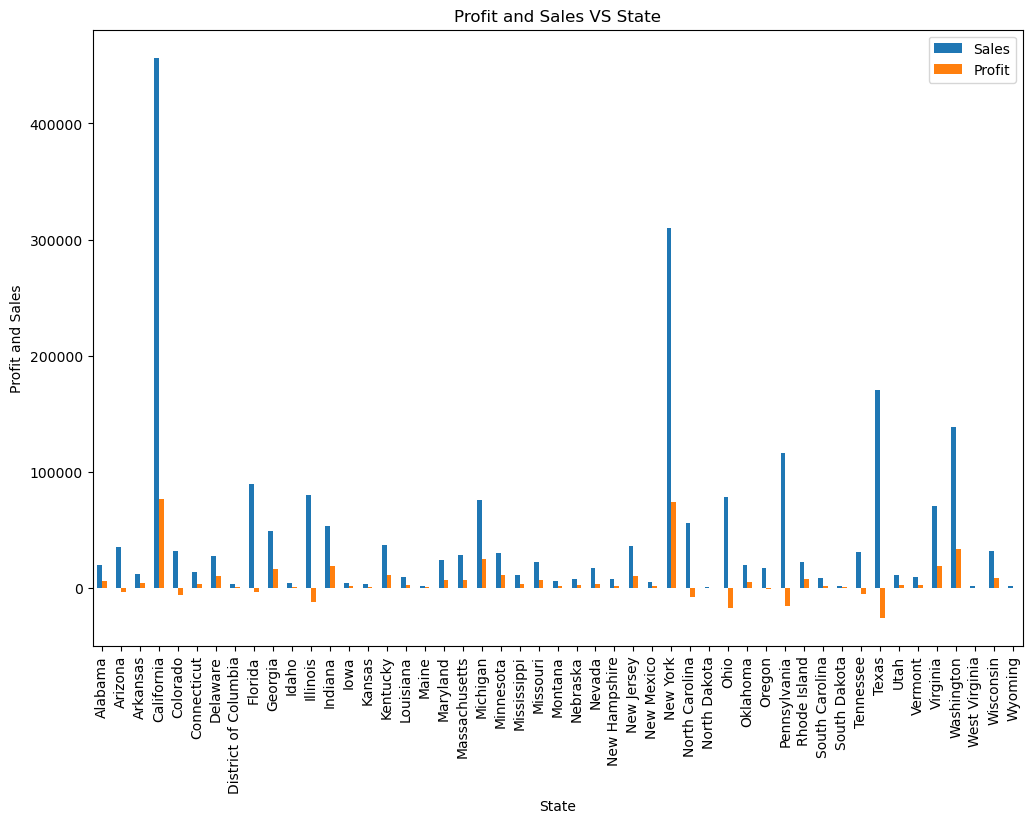

In [47]:
state.plot(kind = "bar", figsize = (12,8))
plt.title("Profit and Sales VS State")
plt.ylabel("Profit and Sales")
plt.show()

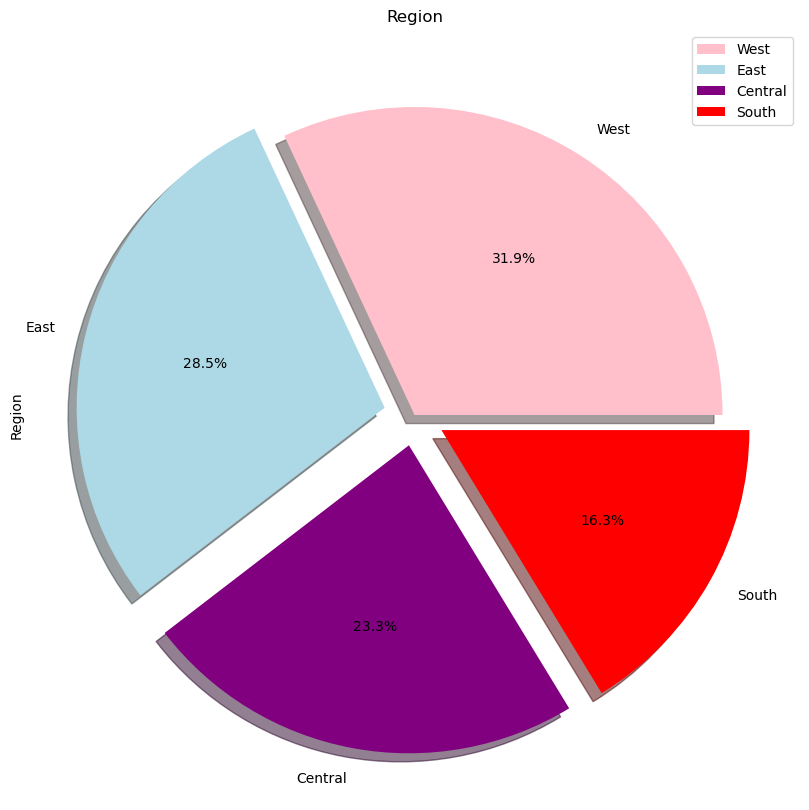

In [50]:
r = df['Region'].value_counts()
r.plot(kind="pie", figsize=(12,10), colors = ['pink', 'lightblue', 'purple', 'red'], explode = [0,0.1,0.1,0.1], shadow=True, autopct="%1.1f%%")
plt.title("Region")
plt.legend(labels=r.index, loc="upper right")

In [51]:
reg = df.groupby("Region")[["Sales","Profit"]].sum()
reg

,Sales,Profit
Region,,
Central,500724.2708,39662.0474
East,677843.9080,91471.0909
South,391721.9050,46749.4303
West,724309.2935,108214.9893


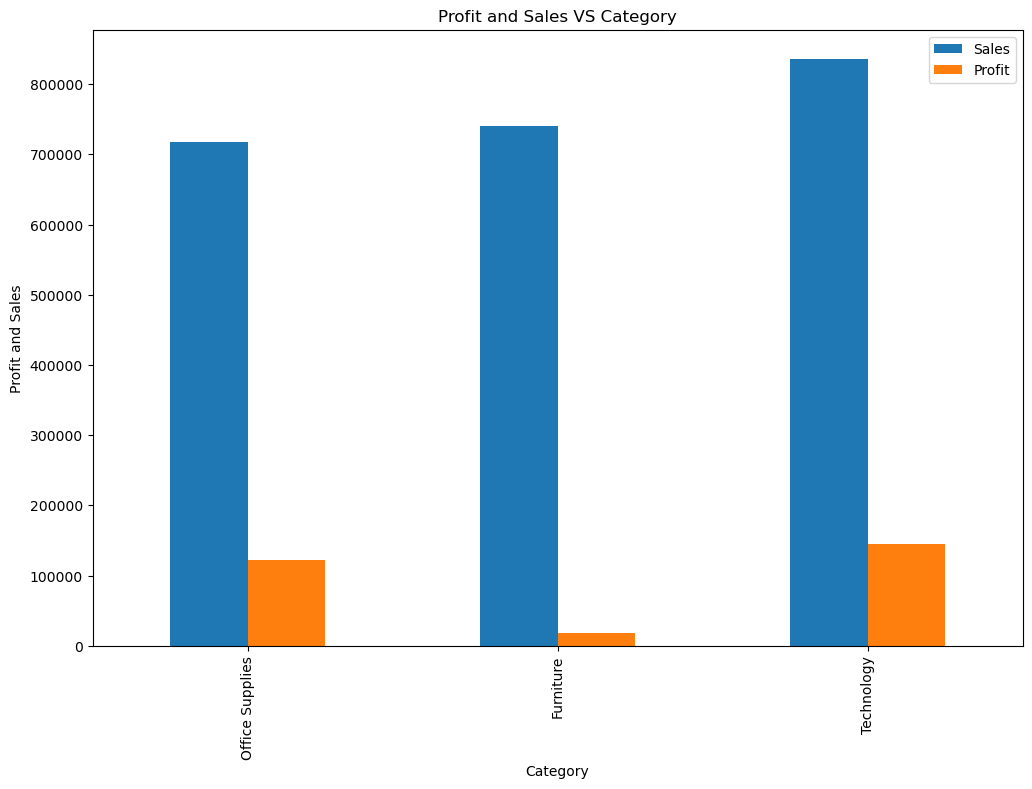

In [52]:
cat = df.groupby("Category")[["Sales","Profit"]].sum().sort_values(by=["Sales","Profit"])
cat.plot(kind = "bar", figsize = (12,8))
plt.title("Profit and Sales VS Category")
plt.ylabel("Profit and Sales")
plt.show()

<Axes: >

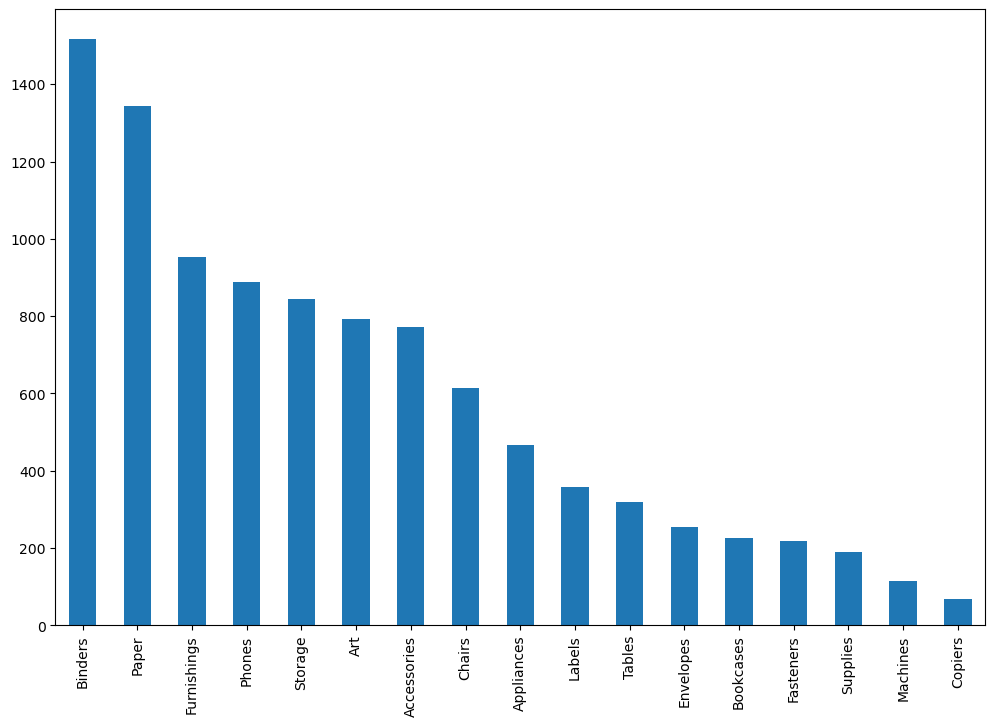

In [53]:
sc = df["Sub-Category"].value_counts()
sc.plot(kind='bar', figsize=(12,8))

In [30]:
scat = df.groupby("Sub-Category")[["Sales","Profit"]].sum().sort_values(by=["Sales","Profit"])
scat

,Sales,Profit
Sub-Category,,
Fasteners,3024.2800,949.5182
Labels,12385.7640,5499.1558
Envelopes,16476.4020,6964.1767
Art,27065.7320,6511.8388
Supplies,46673.5380,-1189.0995
Paper,77960.8940,33830.0381
Furnishings,91658.4440,13042.0534
Appliances,107532.1610,18138.0054
Bookcases,114166.9293,-3398.7542


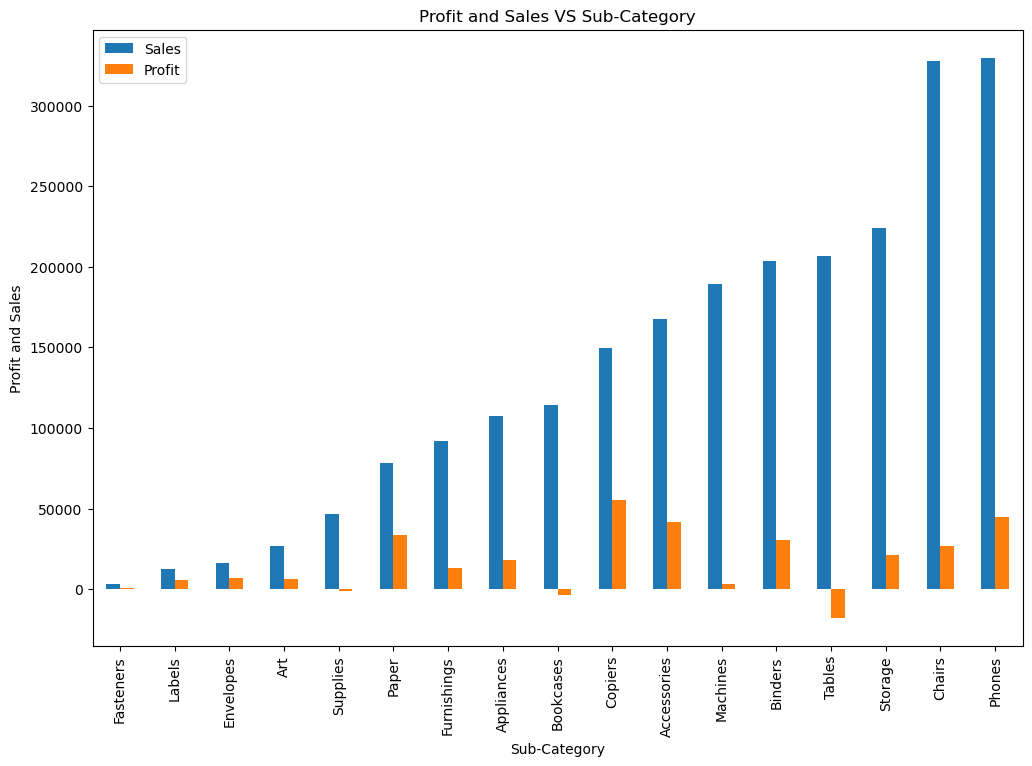

In [54]:
scat.plot(kind = "bar", figsize=(12,8))
plt.title("Profit and Sales VS Sub-Category")
plt.ylabel("Profit and Sales")
plt.show()

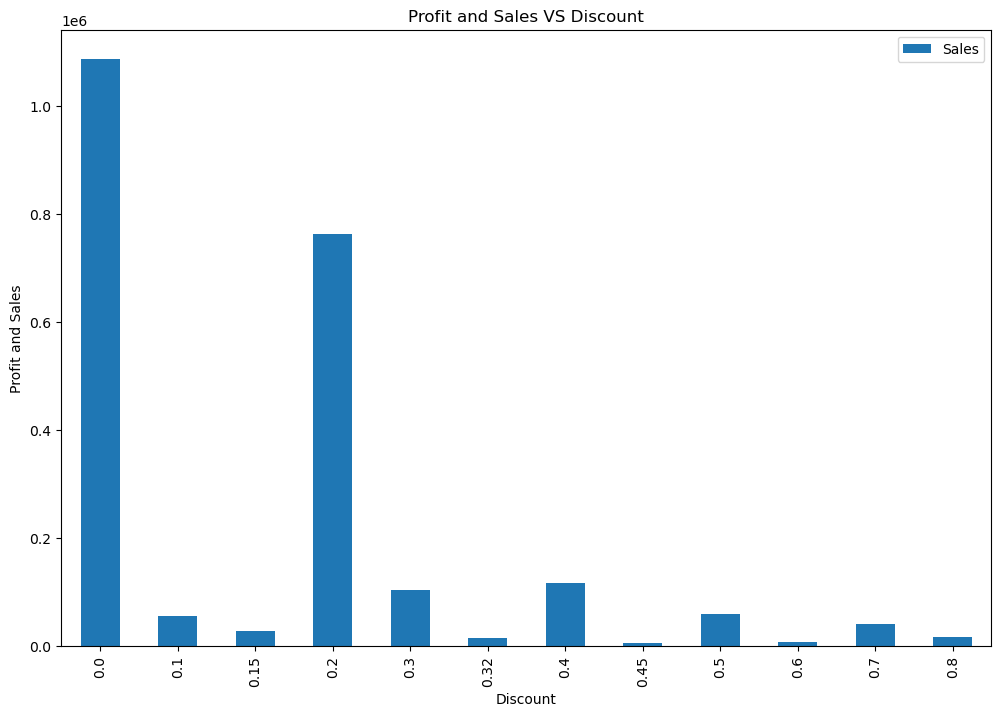

In [55]:
d = df.groupby("Discount")[["Sales"]].sum()
d.plot(kind = "bar", figsize=(12,8))
plt.title("Profit and Sales VS Discount")
plt.ylabel("Profit and Sales")
plt.show()

In [33]:
df.isnull().sum()

Ship Mode       0
Segment         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64